<a href="https://colab.research.google.com/github/spacemaninSeoul/justpractice/blob/main/composition_methods_of_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 케라스의 모델 구성 방법

케라스에서 모델을 구성하는 방법에는 세 가지가 존재한다.
 - Sequential()
 - 서브클래싱(Subclassing)
 - 함수형 API

지금까지 계속 사용해왔던 Sequential() 방법은 매우 간단히 사용할 수 있지만, 복잡한 모델을 구성할 수 없다는 단점이 존재한다. 여기서 복잡한 모델이란, 다중 입력과 출력이 존재하는 모델을 의미한다. 예를 들어, 특정 이미지 데이터와 이를 설명할 수 있는 정보를 동시에 입력하는 경우가 있다.

앞으로 다뤄볼 방법들은 이를 가능케 하여 모델을 더욱 유연하게 구성할 수 있게 해준다. 이중에서도 함수형 API는 가장 자주 사용되며, 권장 사항에 해당된다. 이제 세 가지 방법을 사용하여 모델을 구성하고, 구조를 확인해보도록 한다.

## 1) Sequential()로 구성하기

Sequential() 방법은 이미 이전의 여러 장에서 사용했던 방법으로 매우 익숙할 것이다. 이 방법은 단순하고 사용하기 쉬워 접근하기 편리하다. 사용 방법은 여러 번 경험했던 것과 같이 층을 순서대로 쌓는 것이다. 다만 앞에서 언급했듯이 Sequential() 방법은 여러 개의 입력과 출력으로 구성할 수 없으며, 층의 구조를 유연하게 만들지 못한다.

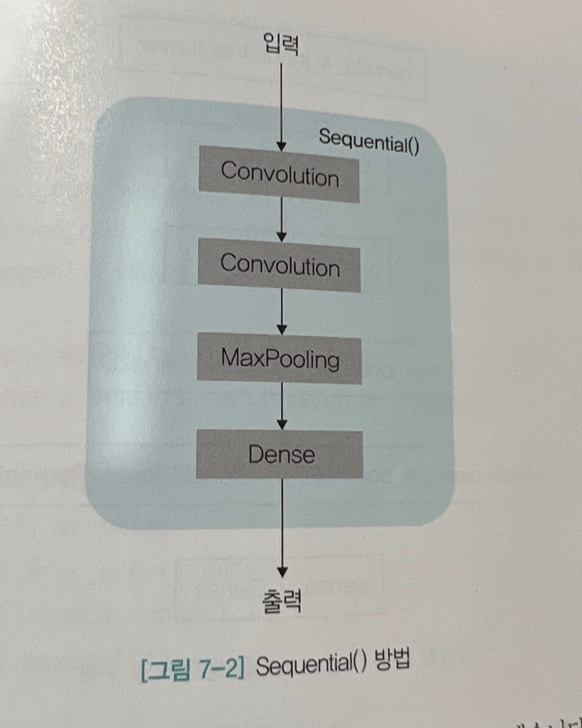

간단한 컨볼루션층으로 이루어진 모델을 구성해보고, 형태를 확인한다.

In [1]:
# Sequential() 모델 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D

from tensorflow.keras.utils import plot_model

# Sequential()을 통한 모델 구성
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(strides = 2))
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 32)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 9,601
Trainable params: 9,601
Non-trainabl

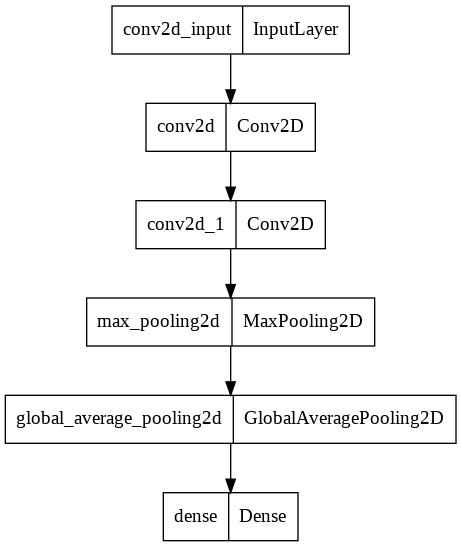

In [2]:
plot_model(model)

단순하게 층을 차례대로 쌓은 구조를 볼 수 있다. 이와 다르게 서브클래싱과 함수형 API 방법은 모델을 유연하게 구성할 수 있으며, 자신만의 모델 구조를 만들기에 적합한 방법이다.

## 2) 서브클래싱으로 구성하기

서브클래싱 방법은 모델 구성을 커스터마이징(customizing)하기에 최적화된 방법이다. 텐서플로우는 객체 지향에 기반한 파이썬을 사용하므로, 케라스의 Model 클래스를 서브클래싱하여 모델을 구성할 수 있다. 이는 Model 클래스를 상속받는다는 의미이다. Model 클래스를 서브 클래스로 사용하면 fit(), evaluate(), predict() 기능, model.layer을 통한 모델에 포함된 층의 목록 제공, 모델 저장(model.save())와 같은 Model 클래스가 보유하고 있는 기능을 그대로 사용할 수 있다.

하지만 자유롭게 층을 구성할 수 있는 커스터마이징이 장점인 만큼, 모델의 층을 일일이 구성해야 하므로 다른 방법에 비해 작업 시간이 오래 걸리는 것이 단점이다. Sequential() 방법으로 구성해 본 모델을 동일하게 만들어 보도록 한다.

In [6]:
# 서브클래싱 모델 구성
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D

class MyModel(Model):
  # 사용할 층을 정의한다
  def __init__(self):
    super(MyModel, self).__init__()

    self.first_conv = Conv2D(32, (3, 3), activation = 'relu')
    self.second_conv = Conv2D(32, (3, 3), activation = 'relu')
    self.maxpool = MaxPooling2D(strides = 2)

    self.gap = GlobalAveragePooling2D()
    self.dense = Dense(1, activation = 'sigmoid')

  # 입력 -> 출력의 흐름을 구성한다.
  def call(self, inputs):
    x = self.first_conv(inputs)
    x = self.second_conv(x)
    x = self.maxpool(x)

    x = self.gap(x)
    x = self.dense(X)

    return x

# 모델 객체를 생성한다.
'''
model = MyModel()
model.compile()
model.fit()
'''

'\nmodel = MyModel()\nmodel.compile()\nmodel.fit()\n'

먼저 init 함수에서 사용할 층을 정의한다. 이후 입력에서부터 출력까지의 흐름인 전파(forward-pass)를 위해 call() 함수에서 모델을 구성한다. 생성된 모델 객체는 Model 클래스에서 제공하는 compile() 함수와 fit() 함수를 사용할 수 있다. call() 함수에서 층을 순서대로 구성하는 것을 보아하니 Sequential() 방법에서 모델을 구성할 때와 다르지 않아 보인다. 하지만 서브클래싱 방법은 inputs 인자를 통해 다중 입력으로 구성하거나 call() 함수의 반환값을 다중 출력으로 구성할 수 있다.

서브클래싱을 통한 모델 구성은 자주 사용하지 않는다. 더 쉽고, 편리한 함수형 API를 사용할 수 있기 때문이다. 하지만 특정 모델의 구현 코드를 참조할 때, 서브클래싱 방법을 활용한 구현 코드를 자주 찾아볼 수 있다. 이를 빠르게 해석하기 위해 알아두면 좋다.